<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import seaborn as sns
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([-0.41285353, -0.18850042,  0.71825351, -0.37327776, -0.08581597,
        0.88503988, -0.12891283, -1.06890409,  0.81661104, -0.56205971,
        1.04770234, -0.73923946, -1.11191182,  0.377727  ,  0.72400759,
        1.41586542, -2.10663246,  1.41825268, -0.39386198, -0.03013025,
        0.31121972,  1.59293237,  0.50469985,  0.55432281, -0.10391877,
        0.50425562,  0.8836068 , -1.34450097,  1.88696497, -2.36984565,
        0.77913219,  0.20595645, -0.88798362,  0.24429915,  1.54815818,
       -0.99982575,  0.24752139, -2.11522874, -1.44132137, -0.5042577 ,
        1.21121396,  1.7841664 , -1.15061057,  0.11610056,  0.44553178,
        1.98587032, -1.39946991,  0.36671006,  2.44548451, -0.94243264,
        1.42417305, -1.30061312, -1.55818507, -1.41403638, -1.3894951 ,
       -0.37213132,  1.42708607,  0.31340931,  1.0022807 , -0.69197978,
       -1.12774907, -0.13554977,  0.11420756, -0.78326185,  0.05835548,
        0.02355748,  1.79583311, -0.12774427, -1.2692377 , -1.31

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

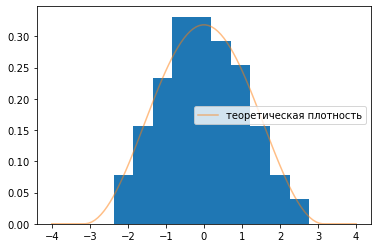

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.033499900541826964
1.1619386907578237


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [ ]:
# ваш код тут
plt.figure(figsize = (16,9))
for N in [10, 100, 1000, 100000]:
    means = []
    for i in range(1000):
        means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha = 0.5)

plt.legend(['10', '100', '1000', '100000'])
plt.show()

In [11]:
N = 30
means = []
for i in range(1000):
    means.append(np.mean(cosine_rv.rvs(N)))

means = np.array(means).astype(np.float32)

[]

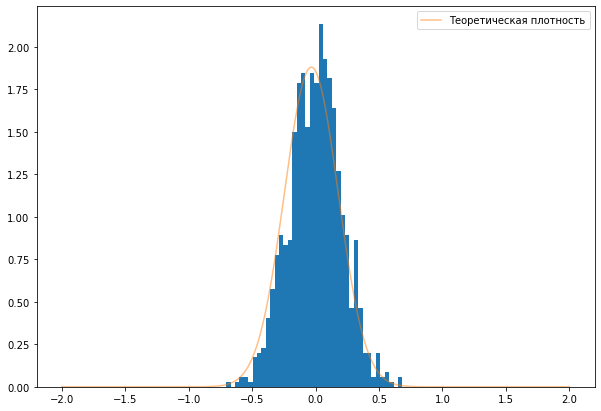

In [17]:
plt.figure(figsize = (10,7))
norm_rv = sts.norm(loc=sample_mean, scale=sample_var / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(-2, 2, 500)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Да, дейтсвительно, при большой выборке можно апроксимировать к нормальному распределению в достаточно хорошей степени

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [23]:
df = pd.read_csv('../HW_5/telecom_churn.csv', usecols = ('total day calls', 'churn'))

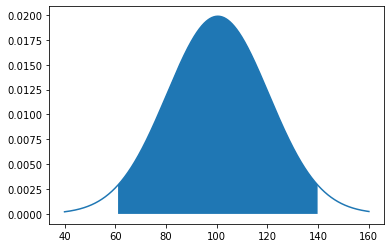

In [103]:
mu = df['total day calls'].mean()
sigma = np.std(df['total day calls'], ddof = 1)
N = df['total day calls'].count().astype(int)
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
sample = np.linspace(40, 160, N)
pdf = norm_rv.pdf(sample)
plt.plot(sample, pdf)
q_a_m = norm_rv.ppf(alpha/2)
q_a_p = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a_m, q_a_p, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill))
plt.show()

In [105]:
from statsmodels.stats.weightstats import _zconfint_generic

In [107]:
_zconfint_generic(mu, sigma, alpha, 'two-sided')

(61.10096131534519, 139.7703258133677)